In [2]:
import csv
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from PIL import Image

In [ ]:
df=pd.read_csv(r"PATH TO CSV CANTAINING CLASS LABELS")

In [4]:
df = df.dropna(how='all')

In [5]:
len(df)

34855

In [7]:
df.level.value_counts()

level
0.0    25665
2.0     5224
1.0     2418
3.0      860
4.0      688
Name: count, dtype: int64

In [8]:
len(df[df.level==0.0])

25665

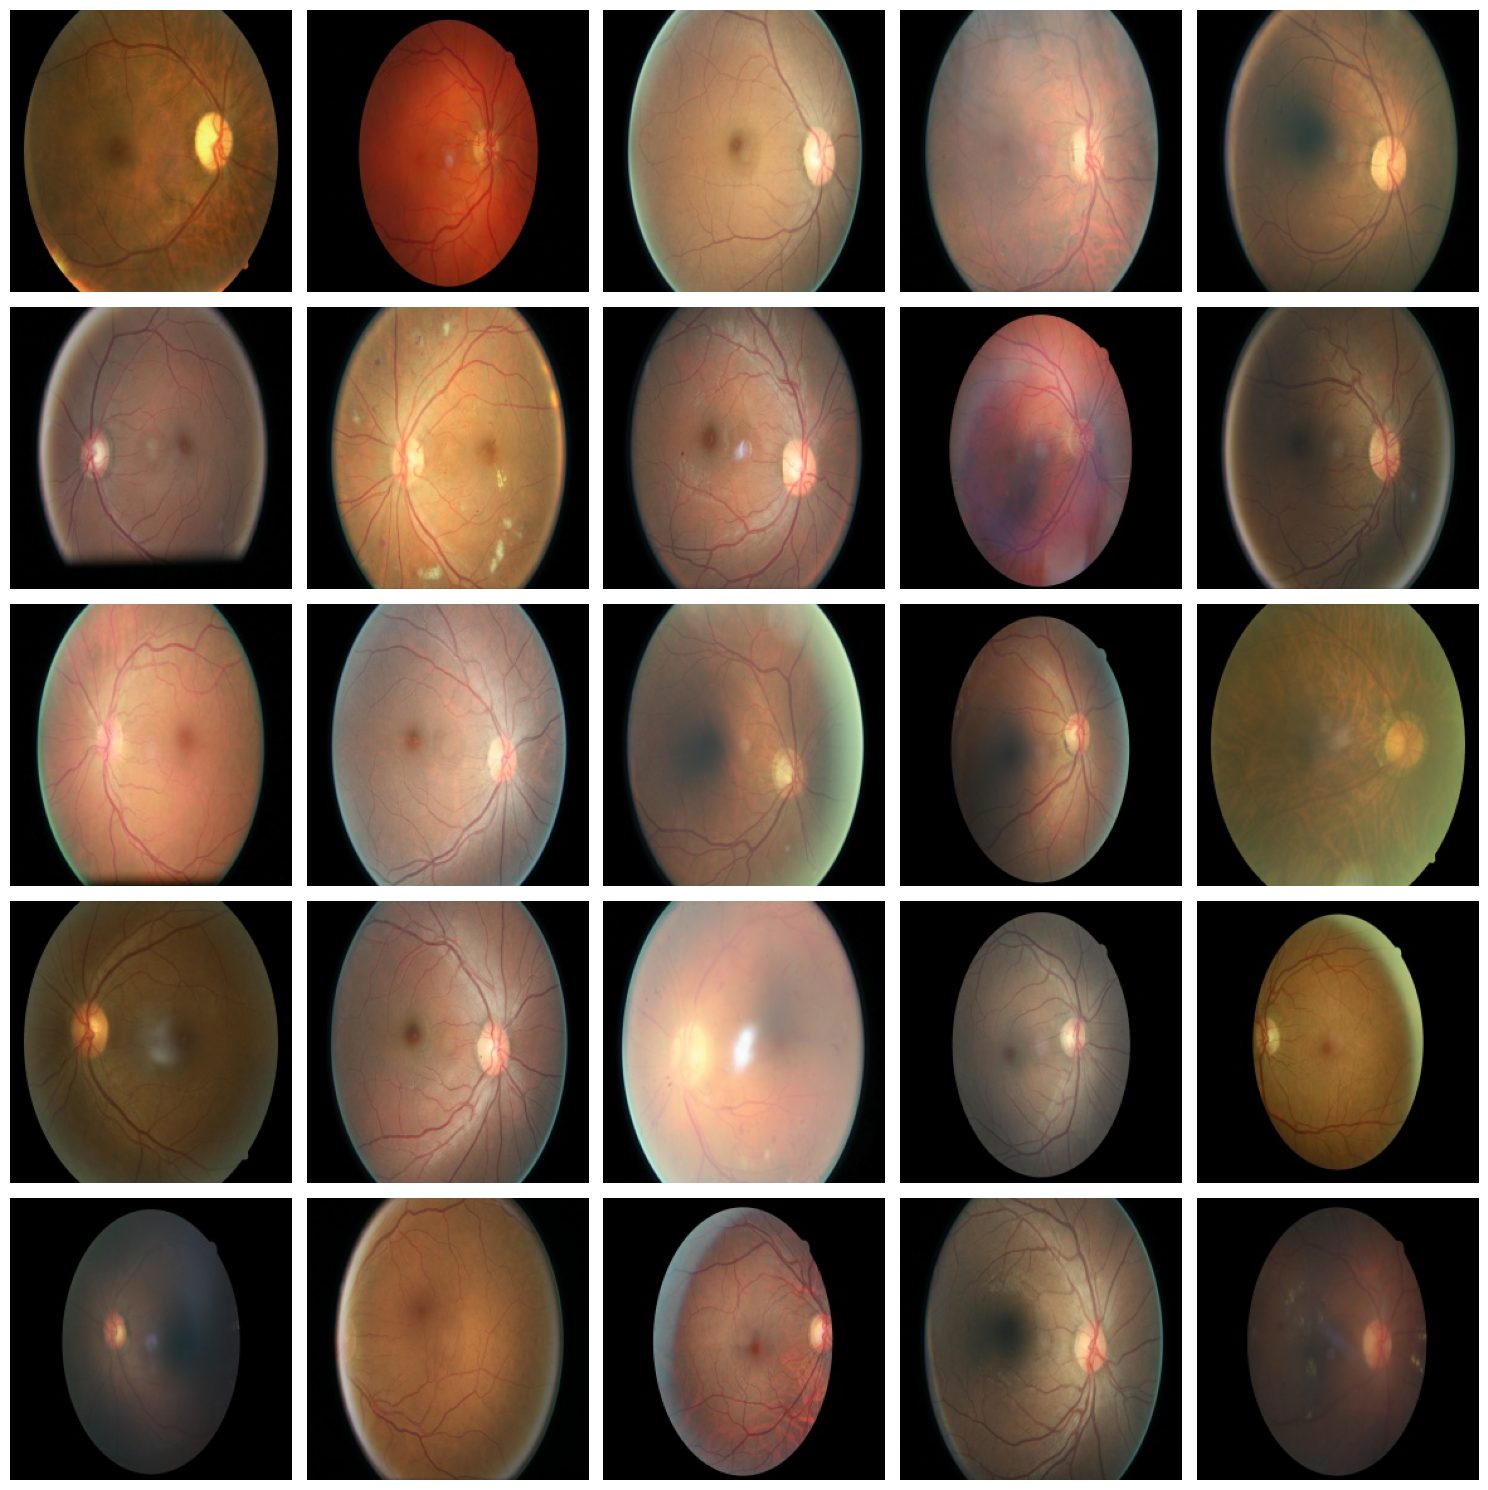

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 15 random images from X_train
num_images = 25
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 3 rows and 5 columns
axes = axes.flatten()  # Flatten the 2D axes array for easier access

# Randomly select 15 images from X_train
indices = np.random.choice(1000, num_images, replace=False)

for i, ax in enumerate(axes):
    img = plt.imread(df.image[indices[i]])
    plt.imshow(img)
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axis labels

plt.tight_layout()
plt.show()

In [ ]:
# MAIN Preprocessing Step
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = crop_image_from_gray(image)
        image = cv2.resize(image, (224,224))
        image=cv2.addWeighted (image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

## Creating a dataset with 5k samples

In [58]:
class_0=df[df.level==0.0].sample(n=1000, random_state=10)
class_1=df[df.level==1.0].sample(n=1000, random_state=10)
class_2=df[df.level==2.0].sample(n=1000, random_state=10)
class_3=df[df.level==3.0]
class_4=df[df.level==4.0]

In [88]:
class_4= resample(
    class_4,
    replace=True,          
    n_samples=1000, 
    random_state=10)
class_3= resample(
    class_3,
    replace=True,          
    n_samples=1000, 
    random_state=10)
len(class_3),len(class_4)


(1000, 1000)

In [89]:
ben_class_0_images=[]
ben_class_1_images=[]
ben_class_2_images=[]
ben_class_3_images=[]
ben_class_4_images=[]

for img_path in class_4.image:
    ben_class_4_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_3.image:
    ben_class_3_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_2.image:
    ben_class_2_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_1.image:
    ben_class_1_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_0.image:
    ben_class_0_images.append((load_ben_color((img_path))/255).astype(np.float32))

In [96]:
X=np.concatenate([ben_class_0_images,ben_class_1_images,ben_class_2_images,ben_class_3_images,ben_class_4_images])


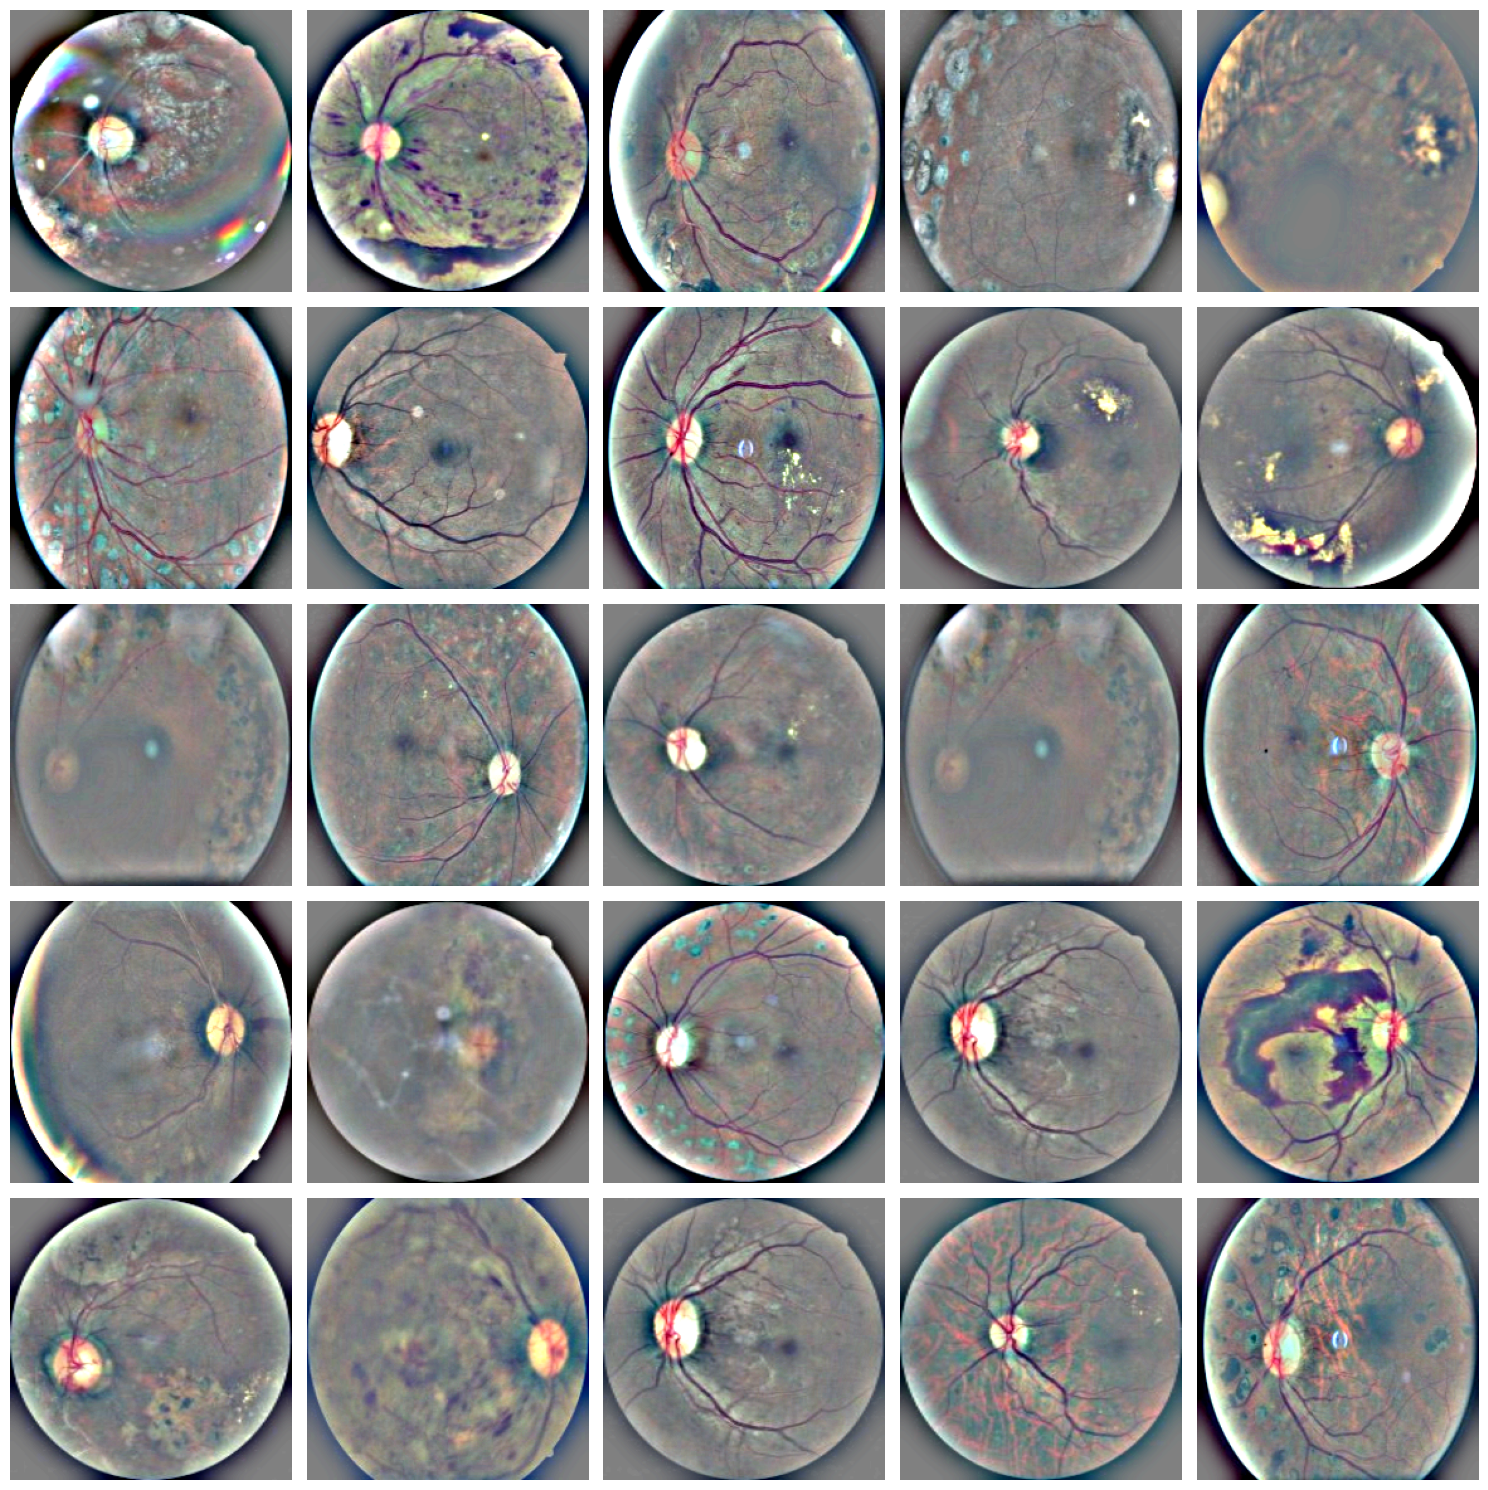

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 15 random images from X_train
num_images = 25
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 3 rows and 5 columns
axes = axes.flatten()  # Flatten the 2D axes array for easier access

# Randomly select 15 images from X_train
indices = np.random.choice(1000, num_images, replace=False)

for i, ax in enumerate(axes):
    img = ben_class_4_images[indices[i]]
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axis labels

plt.tight_layout()
plt.show()


In [ ]:
np.save(r"PATH TO SAVE.npy",X)

# Creating a larger  dataset:10k

In [102]:
class_0=df[df.level==0.0].sample(n=2000, random_state=10)
class_1=df[df.level==1.0].sample(n=2000, random_state=10)
class_2=df[df.level==2.0].sample(n=2000, random_state=10)
class_3=df[df.level==3.0]
class_4=df[df.level==4.0]

In [103]:
ben_class_0_images=[]
ben_class_1_images=[]
ben_class_2_images=[]
ben_class_3_images=[]
ben_class_4_images=[]

for img_path in class_4.image:
    ben_class_4_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_3.image:
    ben_class_3_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_2.image:
    ben_class_2_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_1.image:
    ben_class_1_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_0.image:
    ben_class_0_images.append((load_ben_color((img_path))/255).astype(np.float32))

In [105]:
len(ben_class_3_images)

860

In [107]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
class_03=np.concatenate([ben_class_0_images,ben_class_3_images])
y03=np.concatenate([np.zeros(2000),np.ones(860) * 3])
class_03_flat = class_03.reshape(len(class_03), -1)
class_03_upsampled,y03_upsampled=smote.fit_resample(class_03_flat,y03)
class_03_4k= class_03_upsampled.reshape(-1, *class_03.shape[1:])
balanced_ben_class_3=class_03_4k[2000:]


In [114]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
class_04=np.concatenate([ben_class_0_images,ben_class_4_images])
y04=np.concatenate([np.zeros(2000),np.ones(688) * 4])
class_04_flat = class_04.reshape(len(class_04), -1)
class_04_upsampled,y04_upsampled=smote.fit_resample(class_04_flat,y04)
class_04_4k= class_04_upsampled.reshape(-1, *class_04.shape[1:])
balanced_ben_class_4=class_04_4k[2000:]

In [115]:
X=np.concatenate([ben_class_0_images,ben_class_1_images,ben_class_2_images,balanced_ben_class_3,balanced_ben_class_4])
X.shape

(10000, 224, 224, 3)

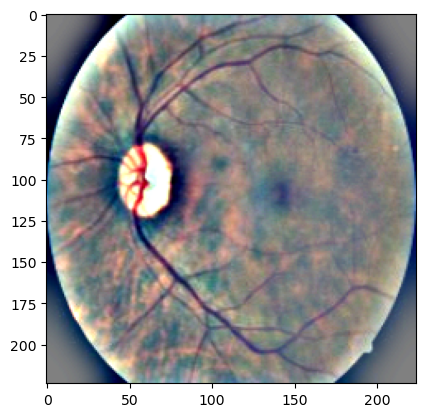

In [120]:
plt.imshow(X[4991])

In [ ]:
np.save(r"PATH/TO/SAVE.npy",X)

## 15k samples


In [ ]:
class_0=df[df.level==0.0].sample(n=3000, random_state=10)
class_1=df[df.level==1.0]
class_2=df[df.level==2.0].sample(n=3000, random_state=10)
class_3=df[df.level==3.0]
class_4=df[df.level==4.0]

ben_class_0_images=[]
ben_class_1_images=[]
ben_class_2_images=[]
ben_class_3_images=[]
ben_class_4_images=[]

for img_path in class_4.image:
    ben_class_4_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_3.image:
    ben_class_3_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_2.image:
    ben_class_2_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_1.image:
    ben_class_1_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_0.image:
    ben_class_0_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
smote = SMOTE(sampling_strategy='auto', random_state=42)
class_03=np.concatenate([ben_class_0_images,ben_class_3_images])
y03=np.concatenate([np.zeros(3000),np.ones(860) * 3])
class_03_flat = class_03.reshape(len(class_03), -1)
class_03_upsampled,y03_upsampled=smote.fit_resample(class_03_flat,y03)
class_03_6k= class_03_upsampled.reshape(-1, *class_03.shape[1:])
balanced_ben_class_3=class_03_6k[3000:]

class_04=np.concatenate([ben_class_0_images,ben_class_4_images])
y04=np.concatenate([np.zeros(3000),np.ones(688) * 4])
class_04_flat = class_04.reshape(len(class_04), -1)
class_04_upsampled,y04_upsampled=smote.fit_resample(class_04_flat,y04)
class_04_6k= class_04_upsampled.reshape(-1, *class_04.shape[1:])
balanced_ben_class_4=class_04_6k[3000:]

class_01=np.concatenate([ben_class_0_images,ben_class_1_images])
y01=np.concatenate([np.zeros(3000),np.ones(2418) * 1])
class_01_flat = class_01.reshape(len(class_01), -1)
class_01_upsampled,y01_upsampled=smote.fit_resample(class_01_flat,y01)
class_01_6k= class_01_upsampled.reshape(-1, *class_01.shape[1:])
balanced_ben_class_1=class_01_6k[3000:]




In [ ]:
data=np.load(r"PATH/TO/15K/ARRAY.npy")

In [8]:
data.shape

(15000, 224, 224, 3)

## saving locally 15k samples classwise for manual inspection

In [34]:
class_0=df[df.level==0.0].sample(n=3000, random_state=10)
class_1=df[df.level==1.0]
class_2=df[df.level==2.0].sample(n=3000, random_state=10)
class_3=df[df.level==3.0]
class_4=df[df.level==4.0]

ben_class_0_images=[]
ben_class_1_images=[]
ben_class_2_images=[]
ben_class_3_images=[]
ben_class_4_images=[]

for img_path in class_4.image:
    ben_class_4_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_3.image:
    ben_class_3_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_2.image:
    ben_class_2_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_1.image:
    ben_class_1_images.append((load_ben_color((img_path))/255).astype(np.float32))
    
for img_path in class_0.image:
    ben_class_0_images.append((load_ben_color((img_path))/255).astype(np.float32))

In [ ]:
save_dir=r'PATH/TO/SAVE'
for i in range(len(ben_class_4_images)):
    image=(ben_class_4_images[i]*255).astype(np.uint8)
    # Create a file name with an index
    filename = os.path.join(save_dir, f"image_{i+1}.png")
    
    # Save the image
    plt.imsave(filename, image)
    print(f"Saved {filename}")
    

In [ ]:
save_dir=r'CLASS/3/PATH'
for i in range(len(ben_class_3_images)):
    image=(ben_class_3_images[i]*255).astype(np.uint8)
    # Create a file name with an index
    filename = os.path.join(save_dir, f"image_{i+1}.png")
    
    # Save the image
    plt.imsave(filename, image)
    print(f"Saved {filename}")

In [ ]:
save_dir=r'CLASS/2/PATH'
for i in range(len(ben_class_2_images)):
    image=(ben_class_2_images[i]*255).astype(np.uint8)
    # Create a file name with an index
    filename = os.path.join(save_dir, f"image_{i+1}.png")
    
    # Save the image
    plt.imsave(filename, image)
    print(f"Saved {filename}")

In [ ]:
save_dir=r'CLASS/1/PATH'
for i in range(len(ben_class_1_images)):
    image=(ben_class_1_images[i]*255).astype(np.uint8)
    # Create a file name with an index
    filename = os.path.join(save_dir, f"image_{i+1}.png")
    
    # Save the image
    plt.imsave(filename, image)
    print(f"Saved {filename}")

In [ ]:
save_dir=r'CLASS/0/PATH'
for i in range(len(ben_class_0_images)):
    image=(ben_class_0_images[i]*255).astype(np.uint8)
    # Create a file name with an index
    filename = os.path.join(save_dir, f"image_{i+1}.png")
    
    # Save the image
    plt.imsave(filename, image)
    print(f"Saved {filename}")

# Creating a new dataset with unwanted samples removed

In [ ]:
prepro_class_0=[]
save_dir = r'CLASS/0/PATH'
for img in os.listdir(save_dir):
    file_path=os.path.join(save_dir,img)
    image = cv2.imread(file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    restored_image = image_rgb.astype(np.float32) / 255.0
    prepro_class_0.append(restored_image)
prepro_class_1=[]
save_dir = r'CLASS/1/PATH'
for img in os.listdir(save_dir):
    file_path=os.path.join(save_dir,img)
    image = cv2.imread(file_path)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    restored_image = image_rgb.astype(np.float32) / 255.0
    prepro_class_1.append(restored_image)
    
prepro_class_2=[]
save_dir = r'CLASS/2/PATH'
for img in os.listdir(save_dir):
    file_path=os.path.join(save_dir,img)
    image = cv2.imread(file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    restored_image = image_rgb.astype(np.float32) / 255.0
    prepro_class_2.append(restored_image)
    
prepro_class_3=[]
save_dir = r'CLASS/3/PATH'
for img in os.listdir(save_dir):
    file_path=os.path.join(save_dir,img)
    image = cv2.imread(file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    restored_image = image_rgb.astype(np.float32) / 255.0
    prepro_class_3.append(restored_image)
    
    
prepro_class_4=[]
save_dir = r'CLASS/4/PATH'
for img in os.listdir(save_dir):
    file_path=os.path.join(save_dir,img)
    image = cv2.imread(file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    restored_image = image_rgb.astype(np.float32) / 255.0
    prepro_class_4.append(restored_image)

In [18]:
len(prepro_class_0),len(prepro_class_1),len(prepro_class_2),len(prepro_class_3),len(prepro_class_4)

(2679, 2231, 2604, 758, 601)

Balancing classes using SMOTE

In [30]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
y=np.concatenate([np.zeros(2679),np.ones(2231),np.ones(2604)*2,np.ones(758)*3,np.ones(601)*4])
X=np.concatenate([prepro_class_0,prepro_class_1,prepro_class_2,prepro_class_3,prepro_class_4])
X_flat=X.reshape(len(X),-1)
X_upsampled,y_upsampled=smote.fit_resample(X_flat,y)
X_prepro=X_upsampled.reshape(-1,*X.shape[1:])

In [31]:
X_prepro.shape

(13395, 224, 224, 3)

In [ ]:
np.save(r"SAVE/PATH/14K.npy",X_prepro)
np.save(r"SAVE/PATH/14K/labels.npy",y_upsampled)

In [41]:
len(prepro_class_0),len(prepro_class_1)

(2679, 2231)

## combining class 0 and 1

In [46]:
class_01=prepro_class_0 + prepro_class_1

In [48]:
len(class_01)

4910

In [51]:
prepro_class_01=[]
random_3k_indices=random.sample(range(4910),3000)

for i in random_3k_indices:
    prepro_class_01.append(class_01[i])
    

In [54]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
y=np.concatenate([np.zeros(3000),np.ones(2604),np.ones(758)*2,np.ones(601)*3])
X=np.concatenate([prepro_class_01,prepro_class_2,prepro_class_3,prepro_class_4])
X_flat=X.reshape(len(X),-1)
X_upsampled,y_upsampled=smote.fit_resample(X_flat,y)
X_prepro=X_upsampled.reshape(-1,*X.shape[1:])


In [55]:
X_prepro.shape

(12000, 224, 224, 3)

In [56]:
np.unique(y_upsampled,return_counts=True)

(array([0., 1., 2., 3.]), array([3000, 3000, 3000, 3000], dtype=int64))

In [ ]:
np.save(r"SAVE/PATH/12K/BALANCED/4/CLASSES.npy",X_prepro)
np.save(r"SAVE/PATH/12K/BALANCED/4/CLASSES/labels.npy",y_upsampled)

In [66]:
2.0 in y_upsampled[5600:5700]

True

In [69]:
np.unique(y_upsampled[6000:9000],return_counts=True)

(array([1., 2., 3.]), array([ 396, 2003,  601], dtype=int64))